In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dcst as dcst
sns.set()

 ## Question 1.a Newman 7.2
 The question asks us to download and read in the number of sunspots since 1749. We will then graph them as a function of time. I will explain in more detail for part B and C when we perform Fourier Analysis on this data. 

In [46]:
a_sunspot_data = np.loadtxt('sunspots.txt')
a_date = a_sunspot_data[:,0]   # The date in months since 1749
a_sun_num = a_sunspot_data[:,1]  # the number of sunspots observed that month


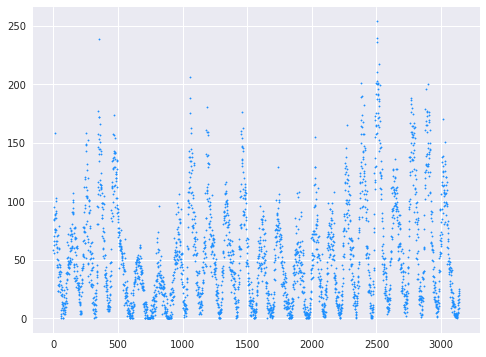

In [48]:
plt.figure(figsize = (8,6))
plt.scatter(a_date,a_sun_num, c = 'dodgerblue', s = 2)
plt.show()

#### Reflection
The visual estimate of the period 4 periods for every 500 months, which means a period every 120 months or once every 10 years. If we have lots of extra time, we could fit this with a sinosouidal function and get a better estimate

### 7.2 Part B
I will perform a FFT on the sunspot data and plot the magnitude of coefficents ( $|c_k|^2$) as a function of $k$, the *power spectrum* for the signal. This will be able to provide meaningful information for part C. 

In [67]:
def DFT(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

In [68]:
a_fourier = DFT(a_sun_num)
a_power = np.real(a_fourier)**2 + np.imag(a_fourier)**2

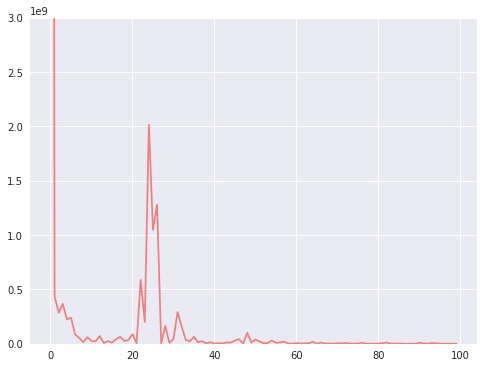

In [78]:
plt.figure(figsize = (8,6))
plt.plot(a_date[:100],a_power[:100], color = 'lightcoral')#, s = 5)
plt.ylim(0,0.3e10)
plt.show()

### Part C
There is an obvious peak at $k = 25$ 

### Question 1 D Exercise 7.3 
This exercise will read in the waveform from an intstrument to be specified and finds out what note it was playing

In [114]:
def NoteFinder(s_instrument):
    a_waveform = np.loadtxt(s_instrument)
    a_fourier = np.fft.fft(a_waveform)
    a_power = np.real(a_fourier)**2 + np.imag(a_fourier)**2
    a_note = np.where(a_power == np.max(a_power))
    plt.plot(a_power[1150:1250])
    plt.show()
    s_note = 
    return a_note
    

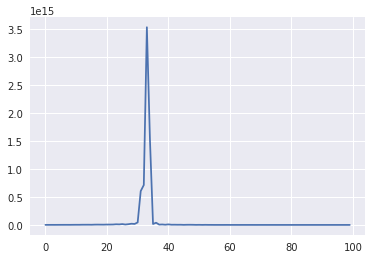

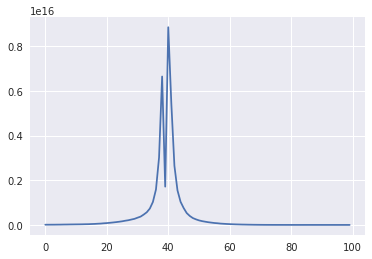

(array([ 1190, 98810]),)


In [115]:
trumpet_note = NoteFinder('trumpet.txt')
piano_note = NoteFinder('piano.txt')
print(piano_note)

### Newman 7.4 

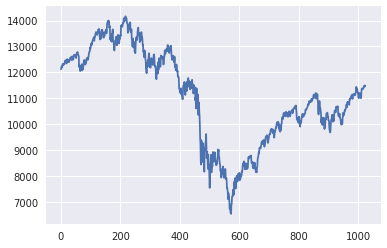

In [4]:
# Part A
a_dow_data = np.loadtxt('dow.txt')
plt.plot(a_dow_data)
plt.show()

In [6]:
a_dow_fft = np.fft.rfft(a_dow_data)
i_percent = len(a_dow_fft)//10     # index for 10%
a_dow_fft[i_percent:] = 0
a_dow_inverse = np.fft.irfft(a_dow_fft)

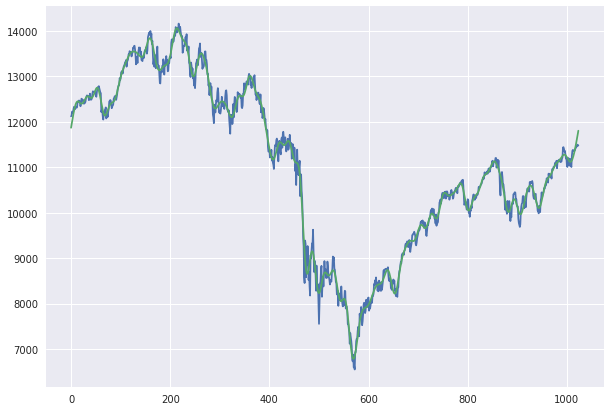

In [10]:
plt.figure(figsize = (10,7))
plt.plot(a_dow_data)
plt.plot(a_dow_inverse)
plt.show()

In [11]:
# part e
a_dow_fft2 = np.fft.rfft(a_dow_data)
i_percent2 = len(a_dow_fft)//50     # index for 2%
a_dow_fft2[i_percent2:] = 0
a_dow_inverse2 = np.fft.irfft(a_dow_fft2)

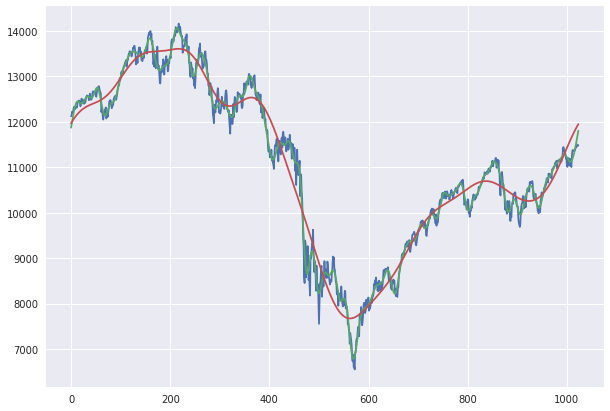

In [12]:
plt.figure(figsize = (10,7))
plt.plot(a_dow_data)
plt.plot(a_dow_inverse)
plt.plot(a_dow_inverse2)

plt.show()

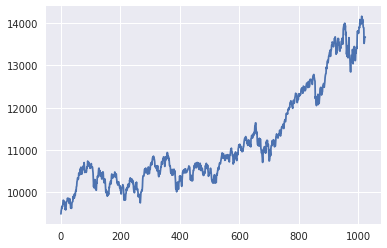

In [13]:
### Exercise 7.6
# Part A
a_new_dow = np.loadtxt('dow2.txt')
plt.plot(a_new_dow)
plt.show()

In [16]:
# 7.6
a_new_fft = np.fft.rfft(a_new_dow)
i_new_percent = len(a_new_fft)//50     # index for 2%
a_new_fft[i_new_percent:] = 0
a_new_inverse = np.fft.irfft(a_new_fft)

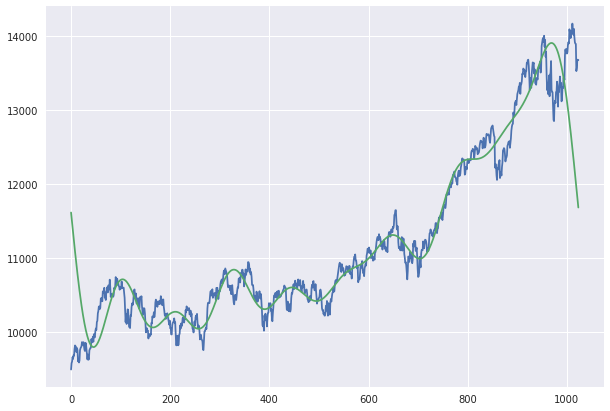

In [17]:
plt.figure(figsize = (10,7))
plt.plot(a_new_dow)
plt.plot(a_new_inverse)
plt.show()

In [30]:
# 7.6
a_new_dct = dcst.dct(a_new_dow)
i_dct_percent = len(a_new_dct)//50     # index for 2%
a_new_dct[i_new_percent:] = 0
a_dct_inverse = np.fft.irfft(a_new_dct)

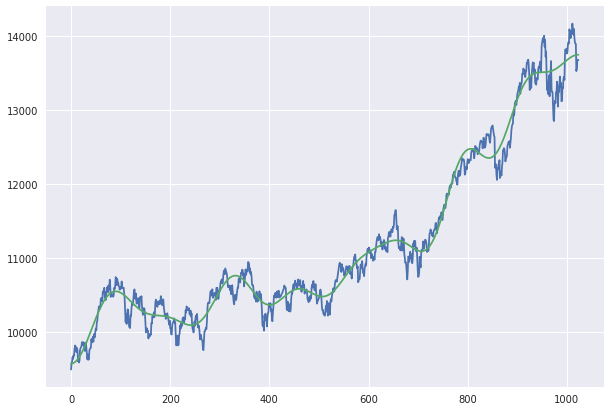

In [31]:
plt.figure(figsize = (10,7))
plt.plot(a_new_dow)
plt.plot(a_dct_inverse[:len(a_new_dow)])
plt.show()